### <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 3  </H3>
<hr style="height:2px;border:none"/>




#### Integrantes 

- Diego Alvarez
- Jorge Nuñez

<a id="segundo"></a>
## 2. Clasificación con clases desbalanceadas

En las tareas de clasificación supervisada, buscamos que mediante los ejemplos etiquetados la maquina pueda aprender los atributos inherentes a las distintas clases. Sin embargo, en muchos casos reales de clasificación, la cantidad de ejemplos de cada clase son muy dispares, en cuyo caso hablamos de clases desbalanceadas. Si uno no aplica estrategias para compensar este problema, la máquina aprenderá muy bien las caracteristicas de la clase más representada pero no logrará extraer información generalizable de la clase menos representada. Además, debemos tener cuidado al momento de interpretar las distintas métricas a las cuales tenemos acceso, pues debemos tomar en cuenta el balance de las clases y la naturaleza del problema para evaluar realmente que tan bueno es el desempeño. 



Para esta parte de la tarea utilizaremos el siguiente _dataset_ publicado en Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud. Este conjunto de datos contiene unos 285000 ejemplos de transacciones con tarjetas de crédito reales, realizadas en 2013 por clientes europeos. Los datos son totalmente anónimos y son el resultado de un PCA a partir de los datos originales excepto por las columnas `Time` con el tiempo en segundos desde la primera transacción, `Amount` con el monto de la transacción y `Class` que indica si la transacción es fraudulenta o no. La tarea en cuestión consiste en lograr predecir cuando una transacción es fraudulenta o no automaticamente, para así poder detenerla antes de que se termine. Sin embargo, por la naturaleza de las transacciones bancarias, este problema es desbalanceado, de hecho de los 285000 transacciones registradas, solo 492 son fraudulentas! A lo largo de esta pregunta pondremos en evidencia los problemas que se originan de este desbalance de clases y trataremos de dar luces a algunas herramientas que nos permitan sortear esos problemas y como medir realmente el desempeño en esta clase de problemas. 

#### 2.a Carga de datos
Descargue los datos y cárguelos usando pandas. Haga una exploración rápida de los datos, cuantos datos hay, como se reparten sus valores.

Grafique la matriz de correlación, a primera vista parece relevante mantener la columna `Time`? En su opinión, conociendo la naturaleza del problema le parece relevante esa información para predecir el _target_?

Cuantos ejemplos hay de cada clase? Son las clases desbalanceadas efectivamente? 

In [1]:
## Librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('creditcard.csv')


In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
print("En el set de datos se encuentran: \n",df.shape[0],"elementos \n", df.shape[1],
      "Características o variables")

En el set de datos se encuentran: 
 284807 elementos 
 31 Características o variables


In [5]:
tabla1 = df.groupby("Class").count()["Time"]
tabla1

Class
0    284315
1       492
Name: Time, dtype: int64

Se aprecia que claramente el set de datos esta desbalanceado

- Clase 0 posee 284315 elementos
- Clase 1 posee 492 elementos

Donde las clases se representan de la siguiente manera: 
- Clase 0: Transacciones verídicas 
- Clase 1: Transacciones fraudulentas

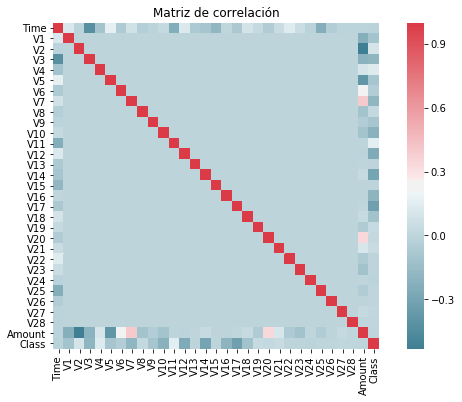

In [6]:
f, ax = plt.subplots(figsize=(10, 6)) 
corr = df.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
      square=True, ax=ax) 
plt.title("Matriz de correlación")
plt.show()

Podemos observar gracias al gráfico de la matriz de correlación que la variable tiempo posee algún tipo de correlación con gran parte de las variables de entrada, por lo que sería bastante apropiado eliminar esta variable, ya que además esta no posee correlación con la variable a predecir

#### 2.b Ligero preprocesamiento

* Escale la columna `Amount`. Por qué es aconsejable realizar esto? Le parece necesario realizarlo en el resto de las columnas? 

* Separe los atributos del _target_.

* Separe luego los datos en _Training set_ y _Validation set_, con un 20% de los datos como validación y el resto como _train_. Asegurese que se mantienen las proporciones de ejemplos de cada clase en ambos sets. 

* Qué ocurriría si por ejemplo todos los ejemplos de la clase 1 quedaran en el _validation set_, que haría cualquier máquina de aprendizaje al aprender solo con la clase 0?

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
## Escalamiento de la variable amount
scaler = StandardScaler()
scaler.fit(df["Amount"].values.reshape(-1,1))
df['Amount'] = scaler.transform(df['Amount'].values.reshape(-1,1))

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,3.202236e-16,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


In [10]:
x = df[df.columns[1:-1]]
y = df[['Class']]

In [11]:
### Ocupamos el parámetro stratify para mantener proporciones
X_train, X_val , Y_train , Y_val = train_test_split(x,y,test_size=0.2,stratify=y)

In [12]:
y_train_0 = Y_train[Y_train['Class']==0]
y_train_1 = Y_train[Y_train['Class']==1]
y_val_0 = Y_val[Y_val['Class']==0]
y_val_1 = Y_val[Y_val['Class']==1]

In [13]:
n0_train = y_train_0.shape[0]
n1_train = y_train_1.shape[0]
n0_val = y_val_0.shape[0]
n1_val = y_val_1.shape[0]

In [14]:
print("Proporción de clases en training set : ",n1_train/(n0_train+n1_train),
      "\nProporción de clases en validation set: ",n1_val/(n0_val+n1_val))

Proporción de clases en training set :  0.001729245759178389 
Proporción de clases en validation set:  0.0017204452090867595


Con lo que concluímos que la proporción de clases si se mantuvo en training set y validation set

Comentarios: Si todos los ejemplos de la clase 1 quedaran en el validation set y solo se tuviera que construir el modelo con ejemplos de la clase 0, el modelo entregaría un pésimo rendimiento para el conjunto de validación, debido a que el modelo no logrará capturar las características esenciales de la clase 1 y arrojará todas las predicciones como si fuera de la clase 0. Es por esto que se debe ser sumamente cuidadoso cuando se trabaja con dataset tan desbalanceados, como lo es este caso.

#### 2.c Regresor logístico

Entrene un regresor logístico con los datos obtenidos de la pregunta anterior y calcule su desempeño (_score_ por ahora) sobre los datos de validación. A priori le parece un buen desempeño? 


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [16]:
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train,np.ravel(Y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
pred_lr = lr_model.predict(X_val)
accuracy = accuracy_score(Y_val,pred_lr)
print("El accuracy del modelo de Regresión Logística en el conjunto de validación es: ",accuracy)

El accuracy del modelo de Regresión Logística en el conjunto de validación es:  0.9992099996488887


Comentario : Considerando `solamente` el accuracy, a priori parece un buen desempeño, sin embargo en las futuras preguntas nos quedará claro que no se acerca para nada nuestros requerimientos, ya que lo primordial de nuestro problema es detectar las transacciones fraudulentas, pero con el indicador de desempeño que estamos considerando no logramos percatarnos si funciona o no.

#### 2.d _Always_ 0

Suponga un modelo le entrega como resultado en el conjunto de validación el siguiente `y_pred`. ¿Qué está haciendo este predictor? ¿Qué _score_ obtendría tal modelo sobre el conjunto de validación? ¿Le parece que el modelo tenga un buen desempeño? Concluya sobre la calidad del _accuracy_ que obtenemos con `.score` para evaluar el desempeño de estos modelos. 

In [18]:
y_pred = pd.np.zeros(Y_val.shape)

Este predictor solamente esta arrojando que independiente de la entrada, pertenecen a la clase 0

In [19]:
ac = accuracy_score(Y_val,y_pred)
print("El accuracy de este modelo en el conjunto de validación es: ",ac)

El accuracy de este modelo en el conjunto de validación es:  0.9982795547909132


Comentarios: De acá podemos concluir que cuando tenemos un dataset desbalanceado, el accuracy será un muy mal indicador, como lo pudimos ver en este caso, que nos podría llevar a conclusiones sumamente erróneas, es por esto que existen diversas formas de tratar este problema:

- Balanceo de clases 
- Ocupar otros indicadores
- etc

#### 2.e Matriz de confusión

Investigue un poco sobre los valores que conforman la matriz de confusión o _confusion matrix_. Comente sobre la significancia de los distintos valores para el problema en cuestión. 

Escriba una función que a partir de un modelo o de los valores predecidos por un modelo, grafique la matriz de confusión. 

In [20]:
#### Función para graficar la matriz de confusión
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax



**Matriz de confusión**

En el campo de la inteligencia artificial una matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

Con la ayuda de esta matriz es posible encontrar indicadores que nos puedan resultar de mayor ayuda a nuestros requerimientos, como lo son:

- Número de positivos reales : VP + FN
- Número de negativos reales : VN + FP
- Número de predicciones correctas: VP + VN
- Número de predicciónes incorrectas : FP + FN

Donde : 
- VP : Verdaderos positivos
- FP : Falsos positivos
- VN : Verdaderos negativos 
- FN : Falsos negativos

Normalized confusion matrix


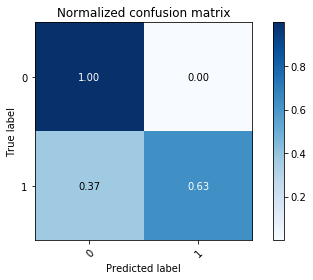

In [46]:
plot_confusion_matrix(Y_val,pred_lr,np.array(['0','1']),normalize=True)
plt.show()

In [22]:
print(classification_report(Y_val,pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.63      0.73        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



Gracias a la matriz de confusión se evidencia que los elementos de la clase 0 se pueden predecir de forma casi perfecta, sin embargo al modelo le resulta difícil predecir los elementos de la clase 1. Esto puede resultar con pérdidas muy elevadas debido a que por cada transacción fraudulenta, es muy alto el costo para el cliente y/o entidad bancaria. 

#### 2.f Curva ROC
La curva ROC tiene bastante utilidad para evaluar la calidad de distintos modelos en estos casos. Investigue un poco sobre su significado para poder interpretarla correctamente y luego escriba una función que reciba un modelo entrenado y la grafíque. 

Note que `sklearn` trae implementado una función que entrega los puntos de la curva ROC, note eso sí que debe entregarle las probabilidades usando el método `predict_proba` del modelo entrenado. 

Para evaluar distintos modelos utilizará bastante las curvas ROC y la matriz de confusión, por lo que sería recomendable escribir una función que reciba un modelo y datos y realice tanto la curva ROC como la matriz de confusión, aunque escribir tal función no es requisito. 

In [23]:
### Función que grafica la curva ROC
def curva_roc(Y_val,proba):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(Y_val, proba ,pos_label=1)
    plt.plot(fpr, tpr, label=np.array(['0','1']),linestyle="-")
    linea = np.linspace(0,1,100)
    plt.scatter(linea,linea,marker='.',c='r')
    plt.title('Curva Roc')
    plt.xlabel("1 - Especificidad")
    plt.ylabel("Sensibilidad")
    

**Curva ROC (Característica Operativa del Receptor)**

- La curva ROC representa  la FPR ( 1 - Especificidad) vs TPR ( Sensibilidad)
- Incrementar la sensibilidad hara bajar la especificidad
- Cuanto Mejor se ajuste la curva al borde superior izquiero, mejor es la predicción del modelo
- Como más cerca se encuentre de la diagonal, peor es el modelo
- Cuanto mayor sea el área bajo la curva, mejor será el modelo



  
  
  
  
 Sensibilidad = $\frac{VP}{VP+FN}$, Especificidad =$\frac{VN}{VN+FP}$

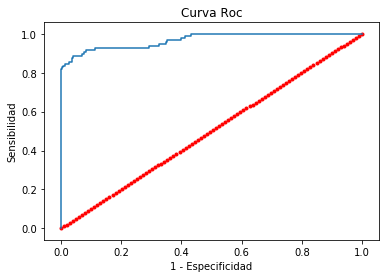

In [24]:
curva_roc(Y_val,lr_model.predict_proba(X_val)[:,1])

#### 2.g Arbol de Clasificación
Entrene un arbol de clasificación para tratar de resolver el problema. Pruebe unas cuantas profundidades máximas distintas y elija una. Si quiere puede modificar los otros hiperparámetros del modelo. 

Evalúe su desempeño respecto a los modelos lineales usando las métricas relevantes y compare su costo computacional. Discuta.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
parameters = {'max_depth':[1,2,3,4,5,6,7]}
model_tree = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid=parameters, cv=5)
model_tree.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
model_tree.best_params_

{'max_depth': 5}

In [28]:
pred_tree = model_tree.predict(X_val)

Confusion matrix, without normalization


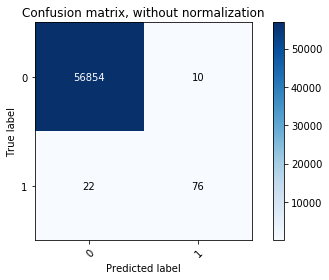

In [47]:
plot_confusion_matrix(Y_val,pred_tree,np.array(['0','1']),normalize=False)

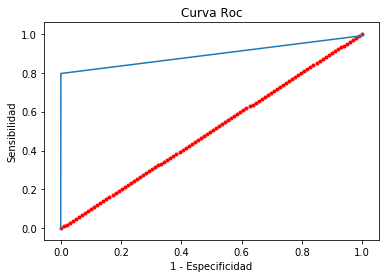

In [30]:
curva_roc(Y_val,model_tree.predict_proba(X_val)[:,1])

In [31]:
print(classification_report(Y_val,pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.78      0.83        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



Comentarios:

Se puede observar utilizando la los indicadores de f1-score , matriz de confusión y Curva ROC, concluimos que el mejor modelo es el de Árbol de clasificación, sin embargo el costo computación es bastante elevado, lo que se vio reflejado en el tiempo de ejecución.

#### 2.h _Undersampling_

Considerando que la gran mayoría del aprendizaje se realiza en los ejemplos no fraudulentos, una aproximación para tratar de mejorar el desempeño de los modelos entrenados es simplemente reducir la cantidad de ejemplos de una clase para obtener nuevos conjuntos de datos con clases más balanceadas. Así, el aprendizaje se realiza de manera más balanceada entre ambas clases y se logran extraer mejor los atributos de cada clase. 

Complete la siguiente función para que realice un _undersampling_ de la clase 0 para obtener una proporción en el nuevo conjundo de datos de `times` veces el numero de transacciones normales frente a fraudulentas. Comente sobre la decisión del parámetro `replace` de la función `numpy.random.choice`. 


Note que la función debe recibir los datos de entrenamiento. Se pide que retorne un conjunto de datos de entrenamiento _undersampled_ para poder entrenar. Las validaciones deben realizarse sobre el conjunto de Validación original. 

In [32]:
def undersample(x_tr, y_tr, times = 10):
    fraud_indices = y_tr[y_tr['Class']==1].index
    normal_indices = y_tr[y_tr['Class']==0].index

    Count_Fraud_transaction = fraud_indices.shape[0]
    
    undersample_index = pd.np.concatenate([
        pd.np.random.choice(
            normal_indices,
            Count_Fraud_transaction * times,
            replace = False)
                            ,
        fraud_indices])
    
    
    undersampled_x = x_tr.loc[undersample_index]
    undersampled_y = y_tr.loc[undersample_index]
    return undersampled_x, undersampled_y

In [33]:
X_train_under, Y_train_under = undersample(X_train,Y_train)

Comentarios: El parámetro `replace` indica si al realizar el muestreo de los indices de las transacciones normales sera con o sin reposición, True para el caso con reposición y False para el caso sin reposición. Para intentar abarcar la mayor cantidad de datos diferentes, consideramos que la mejor elección de este parámetros es dejarlo en False.


#### 2.i Entrenar con _Undersampling_

Pruebe distintos valores para el parámetro `times` y evalue si hay diferencias significativas en la curva ROC y la matriz de confusión para el mismo árbol de clasificación entrenado anteriormente. Evidentemente el número de ejemplos de entrenamiento cambia a medida cambia el parámetro `times`, sin embargo nuestro interés no es que tan bien se comporta el modelo sobre los datos de entrenamiento si no sobre los de validación, los cuales deben ser constantes a lo largo del análisis.

¿Como se comparan estos modelos con el modelo con todos los datos (recuerde que las comparaciones deben hacerse calculando el desempeño sobre el conjunto de validación completo con el modelo una vez entrenado)? ¿Ve alguna ventaja en el uso de _undersampling_ frente al uso de todos los datos? 

Undersampling con parámetro times= 1
Confusion matrix, without normalization


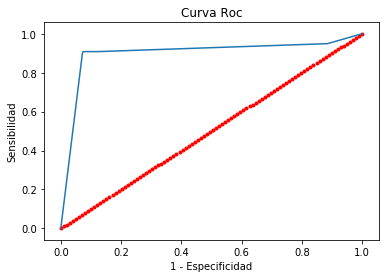

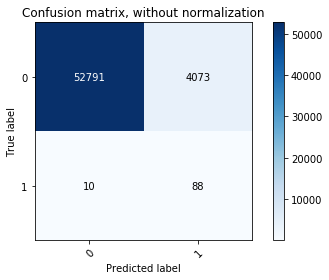

Undersampling con parámetro times= 3
Confusion matrix, without normalization


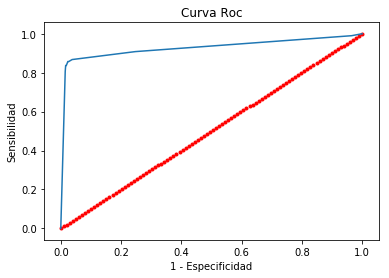

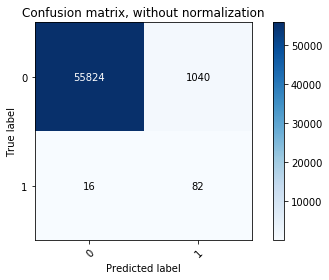

Undersampling con parámetro times= 5
Confusion matrix, without normalization


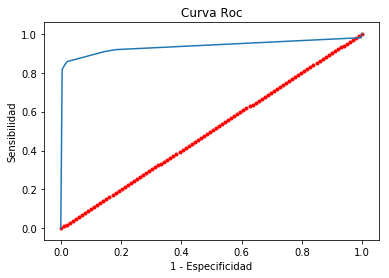

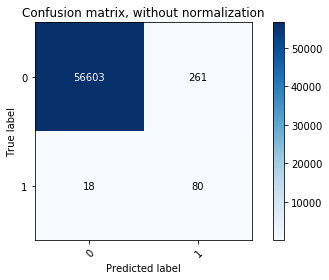

Undersampling con parámetro times= 7
Confusion matrix, without normalization


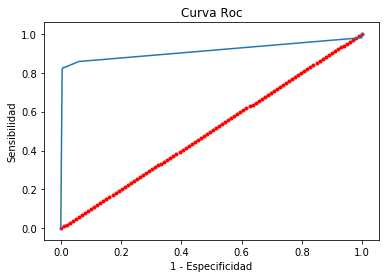

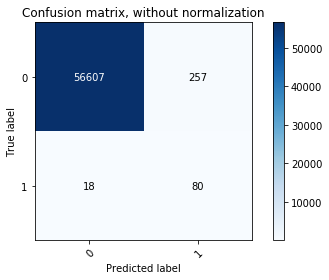

Undersampling con parámetro times= 9
Confusion matrix, without normalization


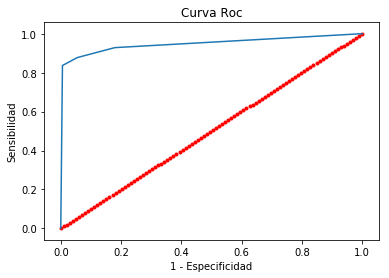

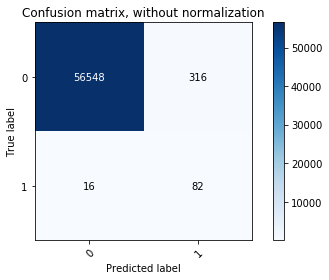

Undersampling con parámetro times= 11
Confusion matrix, without normalization


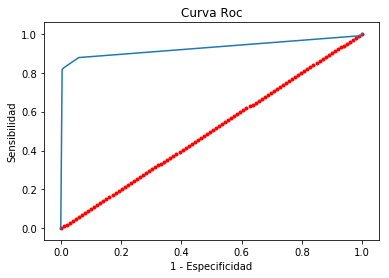

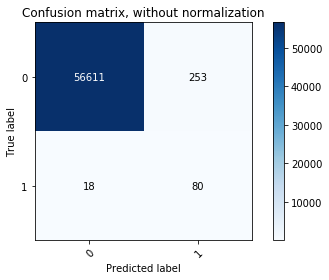

Undersampling con parámetro times= 15
Confusion matrix, without normalization


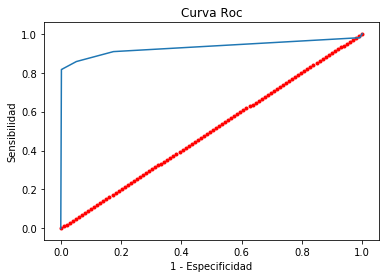

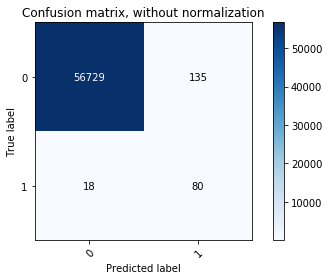

Undersampling con parámetro times= 17
Confusion matrix, without normalization


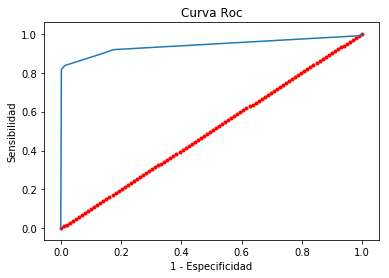

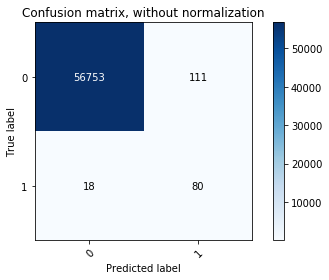

In [34]:
times = [1,3,5,7,9,11,15,17]

for time in times:
    X_train_under,Y_train_under = undersample(X_train,Y_train,times=time)
    model_tree = DecisionTreeClassifier(max_depth=6)
    model_tree.fit(X_train_under,Y_train_under)
    prediccion = model_tree.predict(X_val)
    print("Undersampling con parámetro times=",time)
    
    curva_roc(Y_val,model_tree.predict_proba(X_val)[:,1]) 
    
    plot_confusion_matrix(Y_val,prediccion,np.array(['0','1']),normalize=False)


Comentario: Estos modelos para que sean comparables, se debe considerar el mismo conjunto de validación y con ellos calcular los índices mas relevantes para poder elegir entre modelos. A lo largo del entrenamiento podemos apreciar que a medida que aumentamos el parámetro times  el modelo logra reconocer de mejor manera los ejemplos de la clase 0, y empieza a reconocer en menor medida los ejemplos de la clase 1.  

Considerando undersampling, apreciamos que además de poder reconocer de mejor manera los elementos de la clase 1 (Con parámetro times bajo), el costo computacional se reduce considerablemente, esto es, debido a que el modelo se ajusta con una menor cantidad de datos.



#### 2.j _Oversampling_

Otra aproximación para resolver el problema de las clases desbalanceadas es hacer _oversampling_. A partir de una muestra relativamente pequeña de ejemplos, en este caso de los casos de fraude, se busca crear un conjunto de datos más grande similar al inicial, que permita al modelo aprender las caracteristicas de esa clase, buscando nuevamente obtener clases más balanceadas que originalmente, pero esta vez sin reducir la cantidad de ejemplos. Esta aproximación tiene la ventaja que no reduce la cantidad de ejemplos pero trae la complicación de decidir cómo se van a crear los datos nuevos.

Dos aproximaciones bastante estandar son SMOTE y ADASYN. Investigue un poco que hace SMOTE y que diferencia implemente ADASYN. Por qué cree puede ser deseable buscar que los datos sintéticos no sean linealmente dependientes de los datos originales? 

Elija alguno de los dos métodos e impelementelo con el árbol entrenado previamente. Comente sobre el desempeño de tal modelo. 

Note que tanto SMOTE como ADASYN tienen muchos parámetros que podrían afectar la calidad de los datos generados. No se requiere que elijan tales parametros (los por defecto bastan), pero se valorará un pequeño comentario sobre los parámetros de los métodos y qué representan en la heuristica utilizada. 

In [55]:
from imblearn.over_sampling import SMOTE, ADASYN

In [56]:
smo = SMOTE()
x_tr_over,y_tr_over = smo.fit_resample(X_train,Y_train)

/Users/macdiegordito/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
tree_model2 = DecisionTreeClassifier(max_depth=6)
tree_model2.fit(x_tr_over,y_tr_over)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Normalized confusion matrix


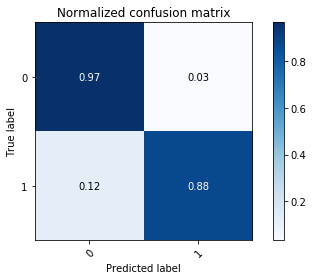

In [58]:
pred_tree2 = tree_model2.predict(X_val)
plot_confusion_matrix(Y_val,pred_tree2,np.array(['0','1']),normalize=True)

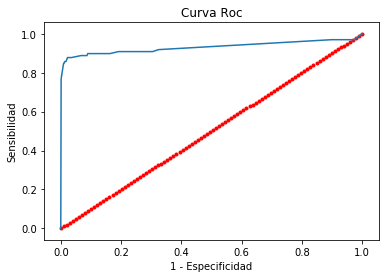

In [59]:
curva_roc(Y_val,tree_model2.predict_proba(X_val)[:,1])

In [60]:
print(classification_report(Y_val,pred_tree2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.88      0.08        98

   micro avg       0.97      0.97      0.97     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.97      0.98     56962



**Smote**

- Parámetros : 
    -  sampling_strategy:float, str, dict or callable, (default=’auto’) : Información de muestreo para volver a muestrear el conjunto de datos.
    - random_state:int, Random State instance or None, optional (default=None): Control de aleatoriedad del algoritmo
    - k_neighbors:int or object, optional (default=5) : Si es entero, es el número de vecinos más cercanos que se usaron para construir muestras sintéticas.


Comentarios : Se observa que el rendimiento de reconocer las transacciones no fraudulentas disminuye, sin embargo el reconocimiento de reconocer las transacciones fraudulentas aumenta, lo cual es mucho mas importante para nuestro problema, que es la detección de transacciones fraudulentas, es por esto que parece ser de mucha ayuda este algoritmo. 

Es deseable que los datos datos sintéticos no sean linealmente dependientes a los datos originales para encontrar otras características no contenidas en los datos originales, debido a que si son linealmente dependientes, capturaremos la misma información generándose así overfitting por la cantidad de datos "similares" en el modelo.

#### 2.k Redes neuronales _Feed Forward_ 

Por útimo, probaremos utilizar una red neuronal densa sobre los datos aumentados. Las Redes Neuronales son una herramienta muy poderosa pero comparativamente costosa frente a otros modelos. Entrenar una red neuronal puede resultar muy costos computacionalmente, por su gran numero de parámetros entrenables y por el caracter iterativo de su entrenamiento. Además, el gran numero de parámetros hace que las redes neuronales sean particularmente sensibles al _overfitting_, por lo cual suele ser necesario tener grandes cantidades de datos para poder entrenar una red neuronal obteniendo desempeños que justifiquen su costo adicional.

Por esto, entrenaremos la red neuronal sobre los datos aumentados. Básese en el código siguiente para crea la red neuronal. Explique los parámetros que se pasan en cada etapa de su creación, para esto puede leer la documentación de keras. Finalente, entrene "completamente" la red, es decir hasta que se estanque el error de validación o comience a aumentar. ¿Cómo se compara la red frente a otros modelos, tanto en desempeño como en costo? 

In [40]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()

model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_tr_over,y_tr_over, epochs=50, validation_data=(X_val,Y_val))


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 454902 samples, validate on 56962 samples
Epoch 1/50
454902/454902 [==============================] - 23s 51us/step - loss: 0.0787 - acc: 0.9699 - val_loss: 0.0478 - val_acc: 0.9865
Epoch 2/50
454902/454902 [==============================] - 23s 50us/step - loss: 0.0394 - acc: 0.9873 - val_loss: 0.0347 - val_acc: 0.9896
Epoch 3/50
454902/454902 [==============================] - 24s 52us/step - loss: 0.0279 - acc: 0.9928 - val_loss: 0.0292 - val_acc: 0.9905
Epoch 4/50
454902/454902 [==============================] - 23s 51us/step - loss: 0.0218 - acc: 0.9953 - val_loss: 0.0254 - val_acc: 0.9918
Epoch 5/50
454902/454902 [==============================] - 28s 61us/step - loss: 0.0181 - acc: 0.9964 - val_loss: 0.0218 - val_acc: 0.9932
Epoch 6/50
454902/454902 [==============================] - 25s 56us/step - loss: 0.0155 - acc: 0.9969 - val_loss: 0.0194 - val_a

In [44]:
epocas = np.arange(50)+1
train_loss = history.history['loss']
val_loss = history.history['val_loss']

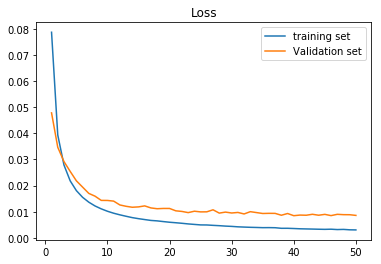

In [45]:
plt.plot(epocas,train_loss)
plt.plot(epocas,val_loss)
plt.legend(["training set","Validation set"])
plt.title("Loss")
plt.show()

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               7680      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 7,937
Trainable params: 7,937
Non-trainable params: 0
_________________________________________________________________


**Redes Neuronales en Keras**

Los modelos en Keras son definidos como una sequencias de capas. Podemos crear un modelo sequencia (Sequencial) y agregar capas una a una hasta que cumplan nuestros requerimientos.
El primer paso es asegurarnos que la primer capa tenga el numero correcto de entradas. Estos puede ser espcificado con el argumento input_dim.

Luego vamos agregando las capas, con su respectiva función de activación (sigmoid,tanh , Relu, etc), compilamos eligiendo el optimizador,función de pérdida, métrica a utilizar.

Para finalmente ajustar el modelo con los datos de entrenamiento y validación y el número de epochs.